In [130]:
import pandas as pd
data_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(data_url)#.fillna(0).set_index("date")

In [131]:
df = df.fillna(0).set_index("date")
df.index = pd.to_datetime(df.index) 
dg = df[["iso_code","new_cases", "total_cases"]]
dh = dg[dg["iso_code"].isin(("AUT","USA","ITA"))]
#dg[dg["iso_code"]=="USA"]

In [132]:
dfita = dh[dh["iso_code"]=="ITA"]
start_date = "2020-02-25"; end_date = "2020-05-08"
mask = (dfita.index > start_date) & (dfita.index <= end_date) 
dfita = dfita.loc[mask]
dfita

,iso_code,new_cases,total_cases
date,,,
2020-02-26,ITA,131.0,453.0
2020-02-27,ITA,202.0,655.0
2020-02-28,ITA,233.0,888.0
2020-02-29,ITA,240.0,1128.0
2020-03-01,ITA,566.0,1694.0
...,...,...,...
2020-05-04,ITA,1221.0,211938.0
2020-05-05,ITA,1075.0,213013.0
2020-05-06,ITA,1444.0,214457.0


In [139]:
dh[dh["iso_code"]=="AUT"]
start_date = "2020-02-25"; end_date = "2020-05-08"
mask = (dfstat.index > start_date) & (dfstat.index <= end_date) 
dfstat = dfstat.loc[mask]
dfstat

,new_cases,total_cases
date,,
2020-02-26,0.000000,0.000127
2020-02-27,0.000757,0.000190
2020-02-28,0.000000,0.000190
2020-02-29,0.004542,0.000571
2020-03-01,0.003785,0.000888
...,...,...
2020-05-04,0.018168,0.990300
2020-05-05,0.021953,0.992139
2020-05-06,0.025738,0.994294


Miscellanea below

minAUT: 2.0
maxAUT: 15774.0 0.00012679092177000128
minITA: 453.0
maxITA: 217185.0 0.0020857794046550177
minUSA: 16.0
maxUSA: 1295396.0 1.2351435391185398e-05


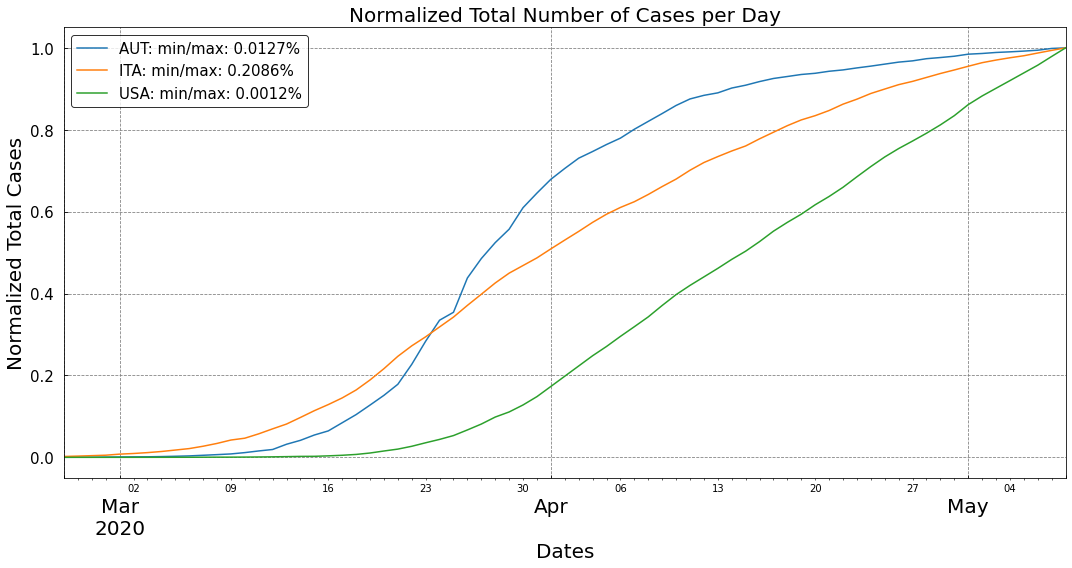

In [154]:
states = ["AUT","ITA","USA"]
def pdstates(state, ax):
    N = int(8.9*1e6)
    df = dh[dh["iso_code"]==state]
    start_date = "2020-02-25"; end_date = "2020-05-08"
    mask = (df.index > start_date) & (df.index <= end_date) 
    df = df.loc[mask]
    maxst = df.iloc[:,-2:].max()["total_cases"]
    minst = df["total_cases"][0]
    #https://sdw.ecb.europa.eu/quickview.do?SERIES_KEY=139.AME.A.AUT.1.0.0.0.ZUTN&periodSortOrder=ASC
    df = df.iloc[:,-2:].apply(lambda x: x/ x.max(), axis=0)
    print(f'min{state}: {minst}',)
    print(f'max{state}: {maxst}', minst/maxst)
    df["total_cases"].plot(ax = axs, label = f"{state}: min/max: {rhu(minst/maxst*100,4)}%")

import matplotlib.pylab as plt
fig, axs = plt.subplots(figsize=(15, 8))
for state in states:
    pdstates(state, ax = axs)
plt.grid(color = "grey", ls = "--")
plt.xlabel("Dates", fontsize = 20); plt.ylabel("Normalized Total Cases", fontsize = 20); 
plt.title("Normalized Total Number of Cases per Day", fontsize = 20)
plt.tick_params(axis = "both", labelsize = 15, direction="in", pad=10)
plt.tick_params(axis = "x", labelsize = 20, direction="in", pad=-25)

#plt.xticks(fontsize=10)
plt.tight_layout()
plt.legend(prop = {"size":15}, edgecolor = "k")


In [140]:
N = int(8.9*1e6)
dfstat = dh[dh["iso_code"]=="AUT"]
start_date = "2020-02-25"; end_date = "2020-05-08"
mask = (dfstat.index > start_date) & (dfstat.index <= end_date) 
dfstat = dfstat.loc[mask]
maxaut = dfstat.iloc[:,-2:].max()["total_cases"]
minaut = dfstat["total_cases"][0]
#https://sdw.ecb.europa.eu/quickview.do?SERIES_KEY=139.AME.A.AUT.1.0.0.0.ZUTN&periodSortOrder=ASC
dfstat = dfstat.iloc[:,-2:].apply(lambda x: x/ x.max(), axis=0)
print(f'minaut: {minaut}',)
print(f'maxaut: {maxaut}', minaut/maxaut)

minaut: 2.0
maxaut: 15774.0 0.00012679092177000128


In [135]:
N = int(6*1e7)
dfita = dh[dh["iso_code"]=="ITA"]
start_date = "2020-02-25"; end_date = "2020-05-08"
mask = (dfita.index > start_date) & (dfita.index <= end_date) 
dfita = dfita.loc[mask]
minita = dfita["total_cases"][0]
maxita = dfita.iloc[:,-2:].max()["total_cases"] #https://www.istat.it/en/archivio/253831 /100 for percentage
dfita = dfita.iloc[:,-2:].apply(lambda x: x/ x.max(), axis=0)
print(f'minita: {minita}',)
print(f'maxita: {maxita}',minita/maxita)


minita: 453.0
maxita: 217185.0 0.0020857794046550177


In [136]:
dfusa = dh[dh["iso_code"]=="USA"]
mask = (dfusa.index > start_date) & (dfusa.index <= end_date) 
dfusa = dfusa.loc[mask]
N = int(3.32*1e8)
maxusa = dfusa.iloc[:,-2:].max()["total_cases"] #https://www.census.gov/popclock/
minusa = dfusa.iloc[:,-2:].min()["total_cases"]
dfusa = dfusa.iloc[:,-2:].apply(lambda x: x/ x.max(), axis=0)
print(f'minusa: {minusa}',)
print(f'maxusa: {maxusa}',minusa/maxusa)

minusa: 16.0
maxusa: 1295396.0 1.2351435391185398e-05


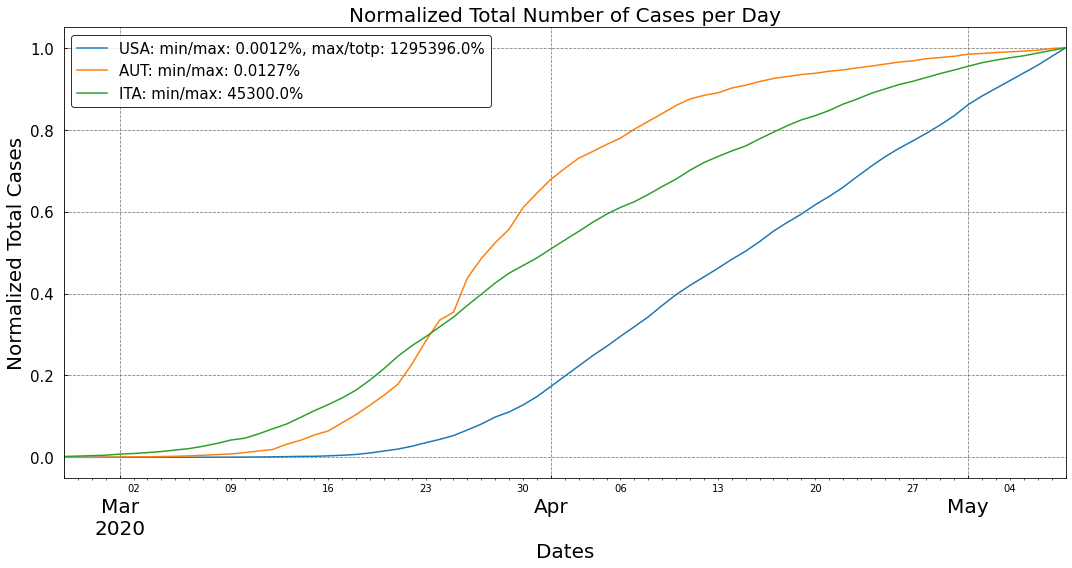

In [137]:
def rhu(n, decimals=0):
    import math
    multiplier = 10 ** decimals
    return math.floor(n*multiplier + 0.5) / multiplier


import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(15, 8))
#dfusa = dh[dh["iso_code"]=="USA"]
#dfstatt = dh[dh["iso_code"]=="AUT"]
dfusa["total_cases"].plot(ax = axs, label = f"USA: min/max: {rhu(minusa/maxusa*100,4)}%, max/totp: {rhu(maxusa,2)}%")
dfstat["total_cases"].plot(ax = axs, label = f"AUT: min/max: {rhu(minaut/maxaut*100,4)}%")
dfita["total_cases"].plot(ax = axs, label = f"ITA: min/max: {rhu(minita*100,4)}%")


plt.grid(color = "grey", ls = "--")
plt.xlabel("Dates", fontsize = 20); plt.ylabel("Normalized Total Cases", fontsize = 20); 
plt.title("Normalized Total Number of Cases per Day", fontsize = 20)
plt.tick_params(axis = "both", labelsize = 15, direction="in", pad=10)
plt.tick_params(axis = "x", labelsize = 20, direction="in", pad=-25)

#plt.xticks(fontsize=10)
plt.tight_layout()
plt.legend(prop = {"size":15}, edgecolor = "k")
path_string = "/home/hal21/MEGAsync/Tour_Physics2.0/Thesis/NetSciThesis/Project/ComplexSpread/LateX/images/Introduction"
plt.savefig(f"{path_string}/COVID-RealStates.png", format="png", dpi=200)

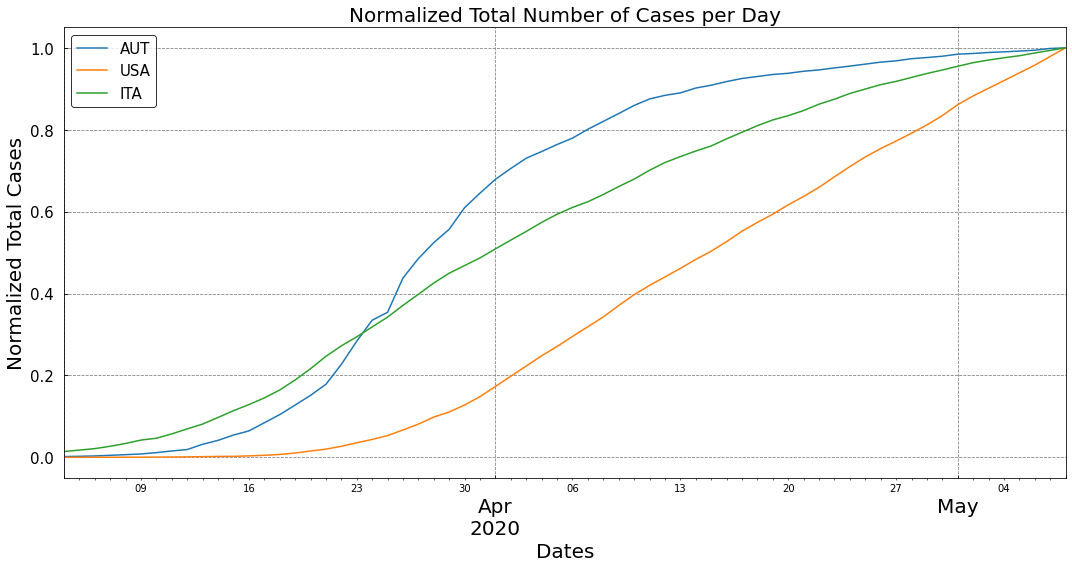

In [152]:
start_date = "2020-03-03"; end_date = "2020-05-08"

def dfstate(state, dg, st_dt, end_dt, ax):
    dfstat = dg[dg["iso_code"]==state]
    mask = (dfstat.index > start_date) & (dfstat.index <= end_date) 
    dfstat = dfstat.loc[mask]
    #dfstat["MA_dni_"+state] = dfstat["new_cases"].rolling(window = 7).mean()
    dfstat = dfstat.iloc[:,1:].apply(lambda x: x / x.max(), axis=0)
    #dfstat["MA_dni_"+state].plot(ax = axs, label = state)
    dfstat["total_cases"].plot(ax = axs, label = state)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(15, 8))
states = ["AUT", "USA", "ITA"]
for state in states:
    dfstate(state, dg = dg, st_dt = start_date, end_dt = end_date, ax = axs)
plt.grid(color = "grey", ls = "--")
plt.xlabel("Dates", fontsize = 20); plt.ylabel("Normalized Total Cases", fontsize = 20); 
plt.title("Normalized Total Number of Cases per Day", fontsize = 20)
plt.tick_params(axis = "both", labelsize = 15, direction="in", pad=10)
plt.tick_params(axis = "x", labelsize = 20, direction="in", pad=-25)

#plt.xticks(fontsize=10)
plt.tight_layout()
plt.legend(prop = {"size":15}, edgecolor = "k")